Exploring the labels of the wildlife dataset

In [9]:
%load_ext autoreload
%autoreload 2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import argparse
import repackage

import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from experiment_utils import set_env, seed_everything
set_env()
from cgn_framework.mnists.generate_data import generate_cf_dataset, generate_dataset, get_dataloaders
from cgn_framework.mnists.generate_data import generate_cf_dataset, generate_dataset, get_dataloaders

## Load datset

In [11]:
dl_train, dl_test = get_dataloaders('wildlife_MNIST', batch_size=1000, workers=8)

In [12]:
print(f"Train: {dl_train.dataset.labels.shape[0]}")
print(f"Test: {dl_test.dataset.labels.shape[0]}")

Train: 50000
Test: 10000


In [13]:
random_idx = np.random.randint(0, dl_train.dataset.labels.shape[0])
#idx = 0

In [18]:
smpl_img = dl_train.dataset.__getitem__(random_idx)['ims']
smpl_label = dl_train.dataset.__getitem__(random_idx)['labels']
smpl_bbg = dl_train.dataset.__getitem__(random_idx)['back_text']
smpl_obg = dl_train.dataset.__getitem__(random_idx)['obj_text']

In [32]:
invTrans = transforms.Compose([
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


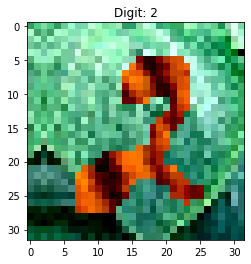

In [33]:
plt.imshow(invTrans(smpl_img).transpose(0,1).transpose(1,2))
label = smpl_label
plt.title(f"Digit: {label}")
plt.show()
#print(f"Background texture: {(smpl_bbg*255).tolist()}")
#print(f"Object color: {(smpl_obg*255).tolist()}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


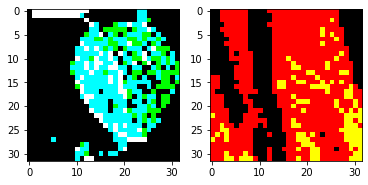

In [27]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(smpl_bbg.transpose(0,1).transpose(1,2)*255)
axs[1].imshow(smpl_obg.transpose(0,1).transpose(1,2)*255)

## Train backrgound CF

In [8]:
from cgn_framework.mnists.models.classifier import CNN
from train_classifier import train, test

# Args for training
args = argparse.Namespace()
args.batch_size = 1000
args.gamma = 0.7
args.epochs = 10
args.lr = 1.0
args.log_interval = 100
args.dataset = 'double_colored_MNIST'

# Data
dl_train, dl_test = get_dataloaders(args.dataset, batch_size=args.batch_size, workers=8)

# Model
model = CNN()

# Optimizer
optimizer = optim.Adadelta(model.parameters(), lr=args.lr)
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)

# push to device and train
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

NameError: name 'argparse' is not defined

In [40]:
# simg = dl_train.dataset.__getitem__(0)['ims']
# slbl = dl_train.dataset.__getitem__(0)['labels']
# bg_text = dl_train.dataset.__getitem__(0)['bg_text']
# obj_text = dl_train.dataset.__getitem__(0)['obj_text']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


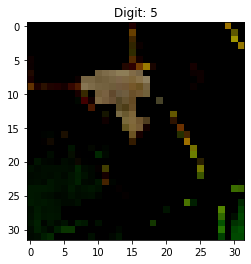

In [39]:
# plt.imshow(simg.numpy().transpose(1,2,0))
# plt.title(f"Digit: {slbl}")
# plt.show()